# Trabalho 2

## 4.2.1 KNN

Neste notebook está o código relacionado com o KNN na sua utilização para classificação.

### Imports

In [1]:
import warnings

import operator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import utilidades as ut

### Inicializações e variáveis

In [2]:
warnings.filterwarnings("ignore")  # Desabilitar warnings.
# Garantir que se utiliza um estilo definido centralmente e comum a todos os gráficos.
plt.style.use("style/estilo.mplstyle")
# plt.style.use('ggplot')

%matplotlib inline

label_encoder = LabelEncoder()

ficheiro = "dados_preparados.csv"
colunas_numericas = ["Idade", "FCV", "NRP", "CA", "FAF", "TUDE", "IMC"]
colunas_classes = ["Genero", "Historico_obesidade_familiar", "FCCAC", "Fumador", "MCC", "CCER", "CBA", "TRANS", "Label"]
colunas_classes_binarias = ['Genero', 'Historico_obesidade_familiar', 'FCCAC', 'Fumador', 'MCC']
colunas_classes_multiplos = ["CCER", "CBA", "TRANS", "Label"]

## Leitura dos dados preparados

In [3]:
dados_trabalho = pd.read_csv(ficheiro)

In [4]:
dados_trabalho

,Genero,Idade,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC
0,Feminino,21.000000,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.000000,Nao,0.000000,1.000000,Nao,Transportes_Publicos,Peso_Normal,24.386526
1,Feminino,21.000000,Sim,Nao,3.0,3.0,Ocasionalmente,Sim,3.000000,Sim,3.000000,0.000000,Ocasionalmente,Transportes_Publicos,Peso_Normal,24.238227
2,Masculino,23.000000,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.000000,Nao,2.000000,1.000000,Frequentemente,Transportes_Publicos,Peso_Normal,23.765432
3,Masculino,27.000000,Nao,Nao,3.0,3.0,Ocasionalmente,Nao,2.000000,Nao,2.000000,0.000000,Frequentemente,Caminhada,Excesso_Peso_Grau_I,26.851852
4,Masculino,22.000000,Nao,Nao,2.0,1.0,Ocasionalmente,Nao,2.000000,Nao,0.000000,0.000000,Ocasionalmente,Transportes_Publicos,Excesso_Peso_Grau_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Feminino,20.976842,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,1.728139,Nao,1.676269,0.906247,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,44.901475
2107,Feminino,21.982942,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.005130,Nao,1.341390,0.599270,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,43.741923
2108,Feminino,22.524036,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.054193,Nao,1.414209,0.646288,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,43.543817
2109,Feminino,24.361936,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.852339,Nao,1.139107,0.586035,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,44.071535


## Encoding

Temos no entanto de realizar primeiro o encoding das classes para valores numéricos, esta operação é realizada usando o ``sklearn.preprocessing.LabelEncoder`` em todas as colunas com apenas 2 classes.

In [5]:
ut.titulo("Valores codificados por atributo")

for coluna in colunas_classes:
    if dados_trabalho[coluna].dtype == 'object':
        dados_trabalho[coluna] = label_encoder.fit_transform(dados_trabalho[coluna].values)
        ut.etiqueta_e_valor(coluna, str(sorted(dados_trabalho[coluna].unique())))

Valores codificados por atributo
Genero: [0, 1]
Historico_obesidade_familiar: [0, 1]
FCCAC: [0, 1]
Fumador: [0, 1]
MCC: [0, 1]
CCER: [0, 1, 2, 3]
CBA: [0, 1, 2, 3]
TRANS: [0, 1, 2, 3, 4]
Label: [0, 1, 2, 3, 4, 5, 6, 7, 8]


In [6]:
dados_trabalho

,Genero,Idade,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC
0,0,21.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,1,4,8,24.386526
1,0,21.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,4,8,24.238227
2,1,23.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,0,4,8,23.765432
3,1,27.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,0,2,0,26.851852
4,1,22.000000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,4,1,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,4,6,44.901475
2107,0,21.982942,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,4,6,43.741923
2108,0,22.524036,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,4,6,43.543817
2109,0,24.361936,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,4,6,44.071535


## Matriz de correlação 

In [7]:
mat_corr = dados_trabalho.corr("spearman")

<Axes: >

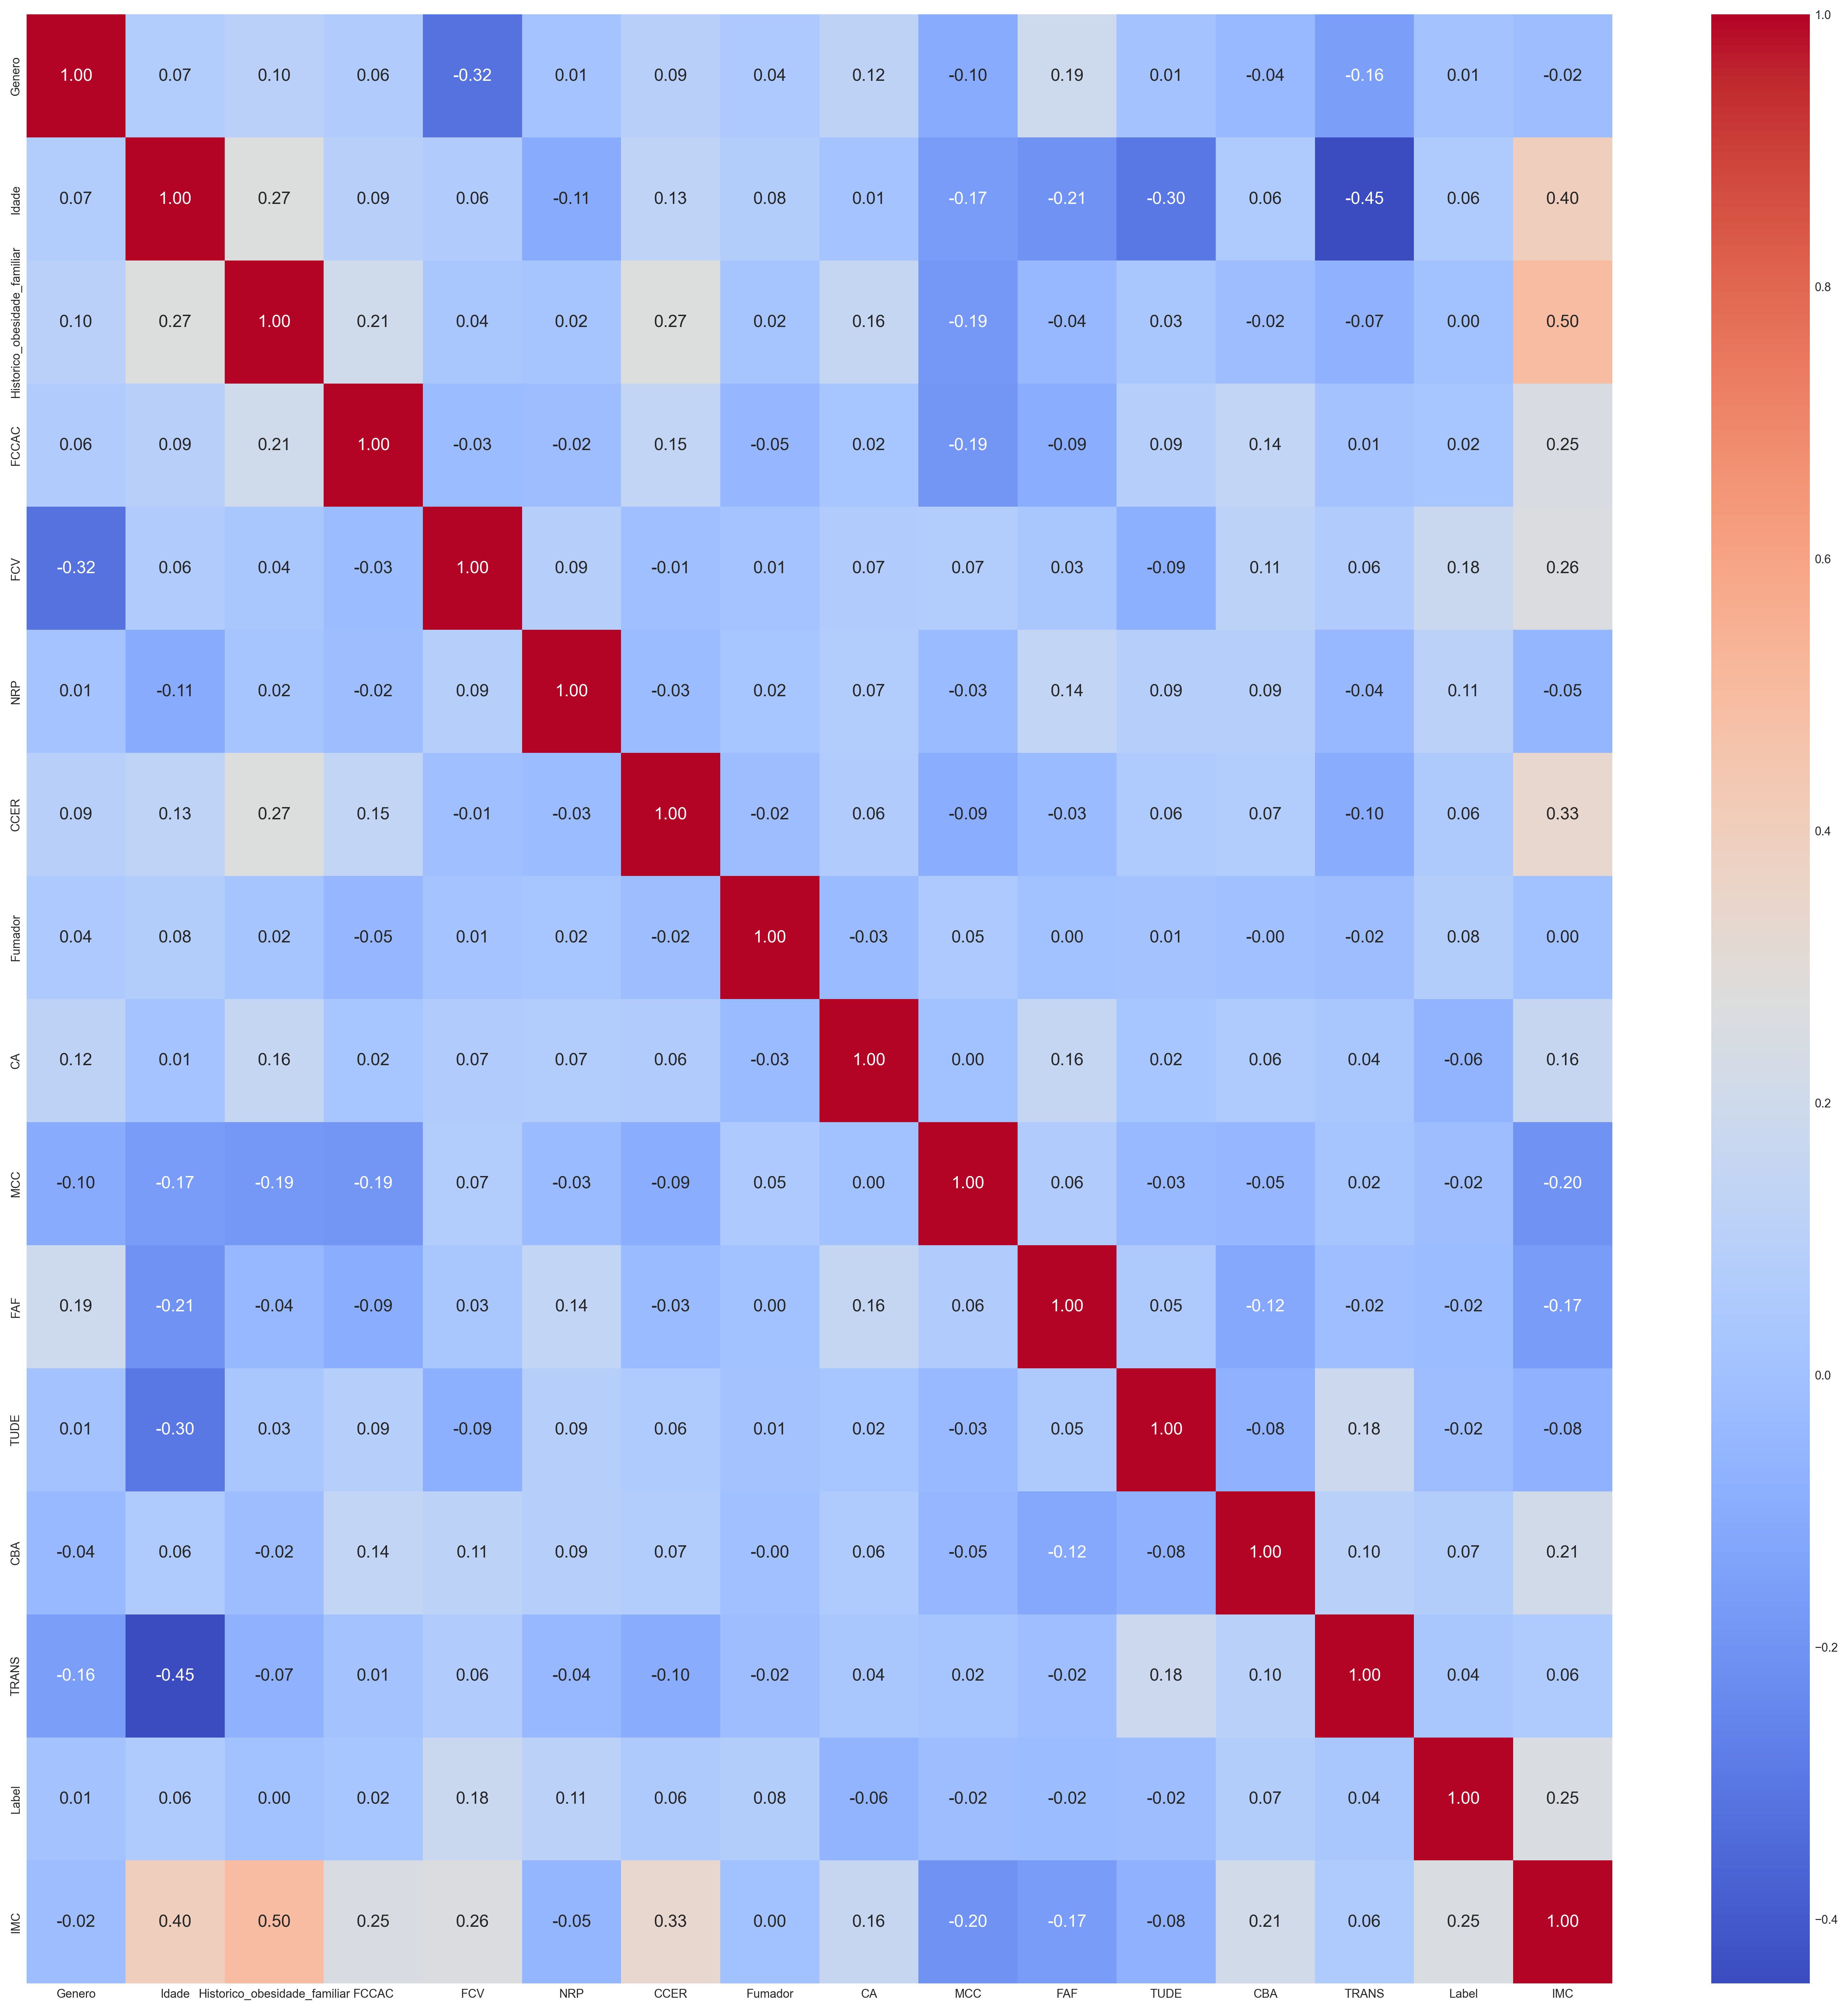

In [8]:
fig_corr, axes_corr = plt.subplots(figsize=(25, 25))
sns.heatmap(mat_corr, cmap='coolwarm', annot=True, fmt='.2f', mask=False)

## Normalização

In [9]:
dados_normalizados = MinMaxScaler().fit_transform(dados_trabalho)
dataframe_normalizado = pd.DataFrame(
    dados_normalizados,
    columns=dados_trabalho.columns
)
dataframe_normalizado

,Genero,Idade,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC
0,0.0,0.148936,1.0,0.0,0.5,0.666667,0.666667,0.0,0.500000,0.0,0.000000,0.500000,0.333333,1.0,1.000,0.301162
1,0.0,0.148936,1.0,0.0,1.0,0.666667,0.666667,1.0,1.000000,1.0,1.000000,0.000000,0.666667,1.0,1.000,0.297240
2,1.0,0.191489,1.0,0.0,0.5,0.666667,0.666667,0.0,0.500000,0.0,0.666667,0.500000,0.000000,1.0,1.000,0.284736
3,1.0,0.276596,0.0,0.0,1.0,0.666667,0.666667,0.0,0.500000,0.0,0.666667,0.000000,0.000000,0.5,0.000,0.366359
4,1.0,0.170213,0.0,0.0,0.5,0.000000,0.666667,0.0,0.500000,0.0,0.000000,0.000000,0.666667,1.0,0.125,0.405778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,0.148443,1.0,1.0,1.0,0.666667,0.666667,0.0,0.364070,0.0,0.558756,0.453124,0.666667,1.0,0.750,0.843697
2107,0.0,0.169850,1.0,1.0,1.0,0.666667,0.666667,0.0,0.502565,0.0,0.447130,0.299635,0.666667,1.0,0.750,0.813032
2108,0.0,0.181362,1.0,1.0,1.0,0.666667,0.666667,0.0,0.527097,0.0,0.471403,0.323144,0.666667,1.0,0.750,0.807793
2109,0.0,0.220467,1.0,1.0,1.0,0.666667,0.666667,0.0,0.926170,0.0,0.379702,0.293017,0.666667,1.0,0.750,0.821749


### Parametrização

Estes valores podem ser ajustados, com base nos gráficos de overfitting.

In [10]:
rand_State = 27
dimensao_treino = 0.7
dimensao_teste = 0.3

kmax = 50
kstep = 2

### Separação do alvo e dos preditores

In [11]:
y = dataframe_normalizado["IMC"]
X = dataframe_normalizado.drop("IMC", axis=1)

In [12]:
# y = dados_trabalho["IMC"]
# X = dados_trabalho.drop("IMC", axis=1)


### Dividir os dados

Temos de dividir os dados em grupos de treino e de teste 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=dimensao_treino, 
    random_state=rand_State
)

In [14]:
X_train.shape, X_test.shape

((633, 15), (1478, 15))

## Cálculo

### Estruturas para guardar os resultados 

In [15]:
valores_rmse = []
lista_k = []
resultados = []

Execução do algoritmo

In [16]:
for k in range(1, kmax, kstep):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    erro = np.sqrt(mean_squared_error(y_test, y_pred))
    valores_rmse.append(erro)
    lista_k.append(k)
    resultados.append((k, erro))
    ut.etiqueta_e_valor(f"RMSE para k={k}:", erro)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

#### Minimo valor de RMSE e k associado 

In [ ]:
min_rmse = min(resultados, key=operator.itemgetter(1))

#### Encontrar o melhor valor de k